<img style="border-radius: 0.5rem;" src="banner.jpg" />
<a style="margin-top: 1rem;" class="btn btn-lg btn-block btn-success" href="https://dsg.ucfsigai.org/fa18/signin/">
    Sign in (https://dsg.ucfsigai.org/fa18/signin/)
</a>

# Support Vector Machines
---
by: Aidan Lakshman \([@ahl98](github.com/ahl98/)\), on 11 Nov 2018

### Disclaimer: I suck at markdown so if it looks like trash that's why

In [66]:
from sklearn import svm, datasets
import numpy as np
from matplotlib import pyplot as plt

#import datasets
digits = datasets.load_digits()
iris = datasets.load_iris()

### First, let's just get a simple SVM model running and make a prediction on a dataset. We'll start with the digits dataset, which is a dataset of images of handwritten digits.

In [75]:
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(digits.data[:-1], digits.target[:-1])  

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### That's all there is to it. Now we can make predictions on the dataset by just calling clf.predict()

In [76]:
print(clf.predict(digits.data[-1:]))
#This will predict that this picture is of an 8.

[8]


# Structure of SVM method in sklearn

sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma=0.0, coef0=0.0, shrinking=True, probability=False,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=None)

## There's a lot of stuff going on in that declaration, but the interesting parameters are 'kernel', 'gamma', and 'C'

### We'll show the effect of them by examples.
### We'll be using the Iris dataset, which is a large dataset on iris flowers

In [67]:
X = iris.data[:, :2] # we only take the first two features. 
y = iris.target

# Let's start by looking at the kernel value.
## we have a few choices for kernel, including 'linear', 'rbf' (radial basis function), 'poly' (polynomial), 'sigmoid', and maybe some others idk

In [55]:
svc_lin = svm.SVC(kernel='linear', C=1.0, gamma='auto').fit(X, y)
svc_rbf = svm.SVC(kernel='rbf', C=1.0, gamma='auto').fit(X, y)
svc_poly = svm.SVC(kernel='poly', C=1.0, gamma='auto').fit(X, y)
svc_sig = svm.SVC(kernel='sigmoid', C=1.0, gamma='auto').fit(X, y)

### These next few lines make the plots pretty.
### I'll try my best to comment them up, don't worry if you don't understand them.

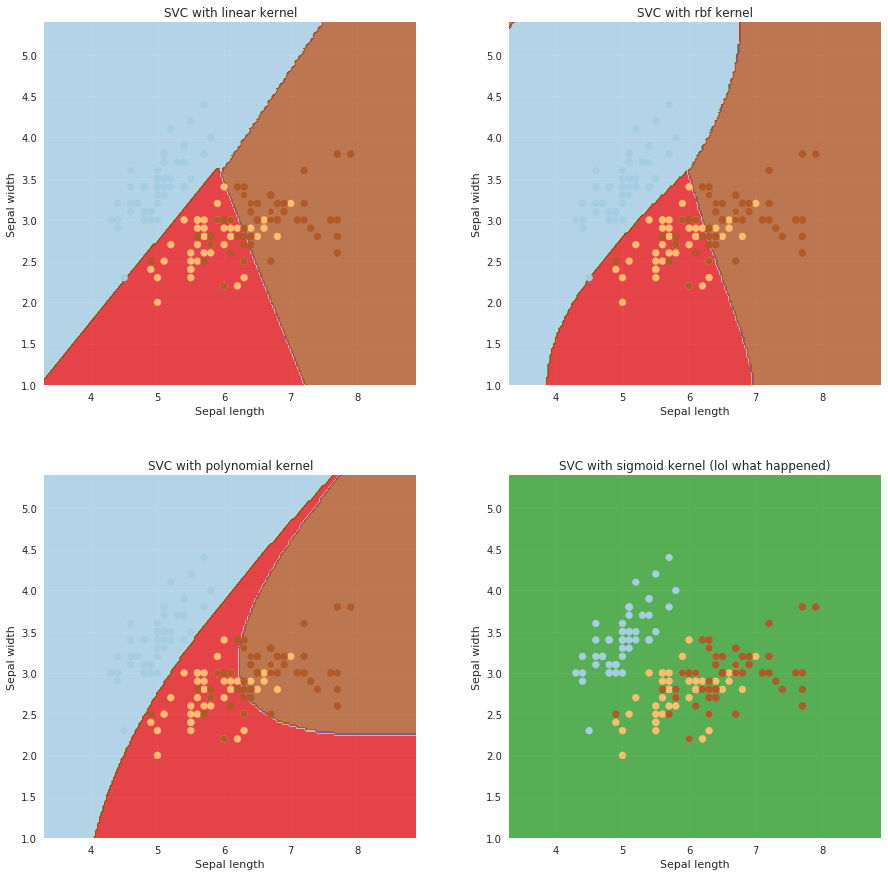

In [60]:
#setting fig size and style
#plt.style.use('seaborn')
fig = plt.figure()
fig.subplots_adjust(hspace = .25, wspace=.25) #add space between subplots
fig.set_size_inches(15, 15) #set size of entire figure

# create a mesh to plot in
# (this makes it pretty)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))


#221 means we have a plot with 2 columns and 2 rows, and this is the 1st plot.
#you can also declare as plt.subplot(2, 2, 1), but either works as long as 
#all three values are single digit integers
plt.subplot(221)

Z = svc_lin.predict(np.c_[xx.ravel(), yy.ravel()]) #!!! THIS IS THE PREDICTION STEP !!!
Z = Z.reshape(xx.shape) #resizing a little to make it prettier
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) #contour map of SVM boundaries

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired) #plotting points on top of the SVM
#dealing with axes and title
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')

#next two plots are the same as the above, with different SVM parameters
plt.subplot(222)
Z = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel')

plt.subplot(223)
Z = svc_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with polynomial kernel')

plt.subplot(224)
Z = svc_sig.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with sigmoid kernel (lol what happened)')

plt.show()

## Linear is better for larger datasets, as it's more likely that the data is linearly separable in higher-dimensional space (so more accuracy and better runtime).
## RBF is good in all situations, but should be used carefully as it has a tendency to overfit data
-----------------
# Next we'll look at the gamma value, which is determines how closely the model will fit the data.
# gamma does not have any affect on linear kernel SVMs

In [52]:
svc_auto = svm.SVC(kernel='rbf', C=1.0, gamma='auto').fit(X, y) #auto sets to lowest possible gamma
svc_10 = svm.SVC(kernel='rbf', C=1.0, gamma=10).fit(X, y)
svc_100 = svm.SVC(kernel='rbf', C=1.0, gamma=100).fit(X, y)
svc_1000 = svm.SVC(kernel='rbf', C=1.0, gamma=1000).fit(X, y)

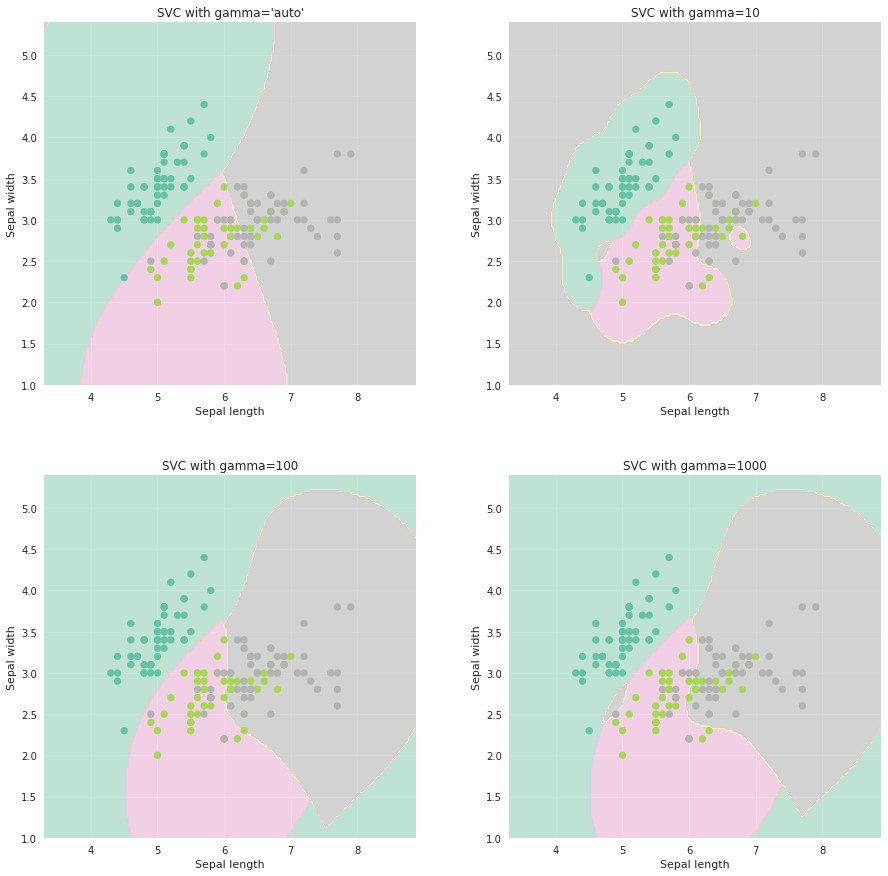

In [59]:
#setting fig size and style
#plt.style.use('seaborn')
fig = plt.figure()
fig.subplots_adjust(hspace = .25, wspace=.25)
fig.set_size_inches(15, 15)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))


plt.subplot(221)
Z = svc_auto.predict(np.c_[xx.ravel(), yy.ravel()]) #!!! THIS IS THE PREDICTION STEP !!!
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel2, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set2)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title("SVC with gamma='auto'")


plt.subplot(222)
Z = svc_10.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel2, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set2)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with gamma=10')

plt.subplot(223)
Z = svc_100.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel2, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set2)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with gamma=100')

plt.subplot(224)
Z = svc_1000.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel2, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set2)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with gamma=1000')

plt.show()

# C is a penalty parameter, it controls the tradeoff between a smooth boundary, and more accurate fitting.
# higher values = more accuracy, lower values = smoother boundaries

In [62]:
svc_1 = svm.SVC(kernel='rbf', C=1.0, gamma='auto').fit(X, y) #auto sets to lowest possible gamma
svc_100 = svm.SVC(kernel='rbf', C=100., gamma='auto').fit(X, y)
svc_10000 = svm.SVC(kernel='rbf', C=10000., gamma='auto').fit(X, y)
svc_mil = svm.SVC(kernel='rbf', C=1000000., gamma='auto').fit(X, y)

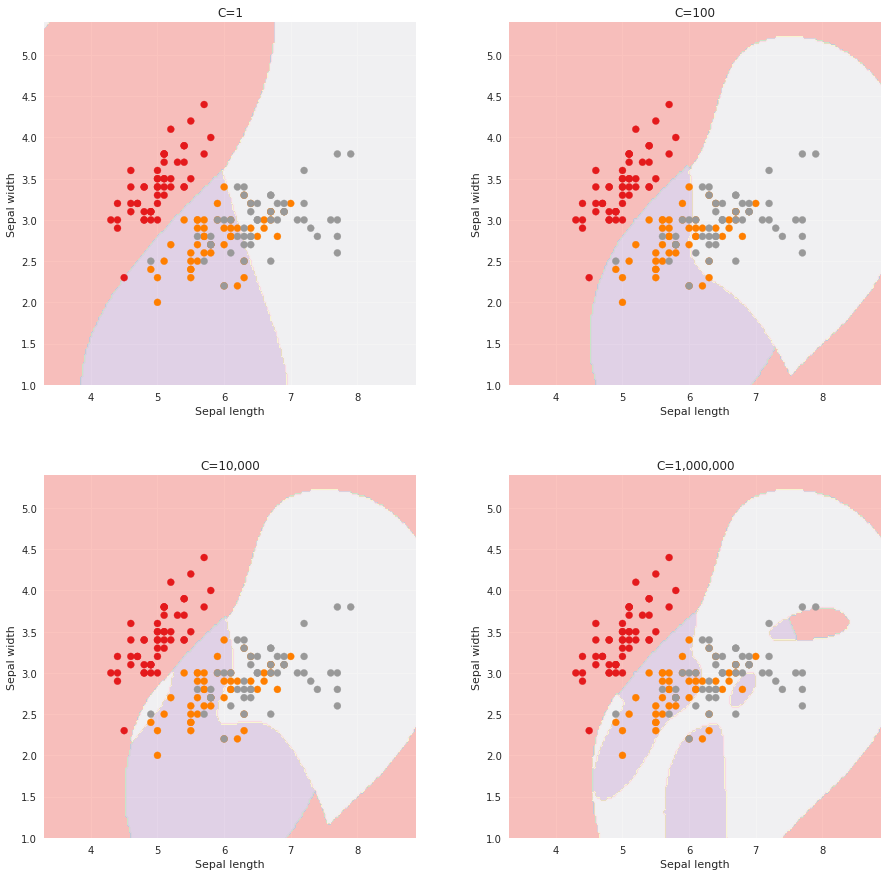

In [64]:
#setting fig size and style
#plt.style.use('seaborn')
fig = plt.figure()
fig.subplots_adjust(hspace = .25, wspace=.25)
fig.set_size_inches(15, 15)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))


plt.subplot(221)
Z = svc_1.predict(np.c_[xx.ravel(), yy.ravel()]) #!!! THIS IS THE PREDICTION STEP !!!
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title("C=1")


plt.subplot(222)
Z = svc_100.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('C=100')

plt.subplot(223)
Z = svc_10000.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('C=10,000')

plt.subplot(224)
Z = svc_mil.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('C=1,000,000')

plt.show()